In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
plt.show()

In [2]:
df = pd.read_csv("BAJAJ-AUTO.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,3972485,2.481245e+14,NaN,1202933,0.3028
1,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.0,580.30,595.50,593.15,606.43,1751063,1.061901e+14,NaN,369389,0.2110
2,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.9,561.65,605.10,608.15,608.75,1652355,1.005877e+14,NaN,898602,0.5438
3,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.4,576.00,600.00,599.45,600.98,669269,4.022165e+13,NaN,449951,0.6723
4,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.0,538.00,576.25,571.70,565.55,1262117,7.137937e+13,NaN,936432,0.7420


In [3]:
data = df[['Date','Open','High','Low','Close','Volume','VWAP']]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3202 non-null   object 
 1   Open    3202 non-null   float64
 2   High    3202 non-null   float64
 3   Low     3202 non-null   float64
 4   Close   3202 non-null   float64
 5   Volume  3202 non-null   int64  
 6   VWAP    3202 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 175.2+ KB


In [5]:
data['Date'] = data['Date'].apply(pd.to_datetime)
data.head()

,Date,Open,High,Low,Close,Volume,VWAP
0,2008-05-26,898.00,898.0,551.35,604.75,3972485,624.61
1,2008-05-27,624.70,639.0,580.30,593.15,1751063,606.43
2,2008-05-28,561.65,621.9,561.65,608.15,1652355,608.75
3,2008-05-29,619.40,619.4,576.00,599.45,669269,600.98
4,2008-05-30,605.40,607.0,538.00,571.70,1262117,565.55


In [6]:
from datetime import datetime
my_year = 2019
my_month = 4
my_day = 21
my_hour = 10
my_minute = 5
my_second = 30

In [7]:
test_date = datetime(my_year, my_month, my_day)
test_date

datetime.datetime(2019, 4, 21, 0, 0)

In [8]:
test_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
print('The day is : ', test_date.day)
print('The hour is : ', test_date.hour)
print('The month is : ', test_date.month)

The day is :  21
The hour is :  10
The month is :  4


In [9]:
print(data.index.max())
print(data.index.min())

3201
0


In [10]:
print('Earliest date index location is: ',data.index.argmin())

print('Latest date location: ',data.index.argmax())

Earliest date index location is:  0
Latest date location:  3201


In [11]:
df_vwap = df[['Date','VWAP']]
df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)
df_vwap.head()

,Date,VWAP
0,2008-05-26,624.61
1,2008-05-27,606.43
2,2008-05-28,608.75
3,2008-05-29,600.98
4,2008-05-30,565.55


In [12]:
df_vwap['year'] = df_vwap.Date.dt.year
df_vwap['month'] = df_vwap.Date.dt.month
df_vwap['day'] = df_vwap.Date.dt.day
df_vwap['day of week'] = df_vwap.Date.dt.dayofweek

df_vwap.set_index('Date', inplace=True)
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2008-05-26,624.61,2008,5,26,0
2008-05-27,606.43,2008,5,27,1
2008-05-28,608.75,2008,5,28,2
2008-05-29,600.98,2008,5,29,3
2008-05-30,565.55,2008,5,30,4


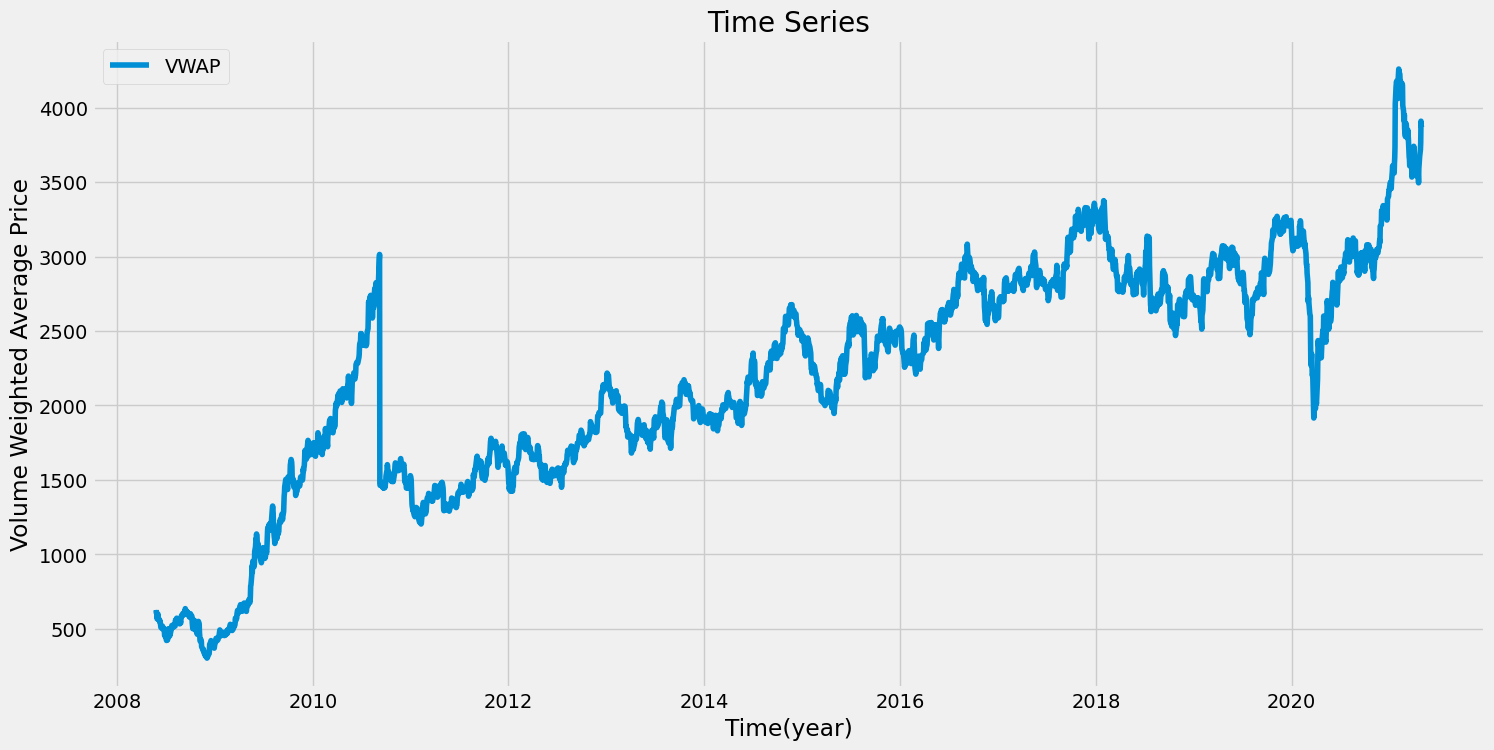

In [13]:
plt.figure(figsize=(16,8))
plt.plot(df_vwap['VWAP'], label='VWAP')
plt.title('Time Series')
plt.xlabel("Time(year)")
plt.ylabel("Volume Weighted Average Price")
plt.legend(loc='best')

<AxesSubplot: xlabel='year'>

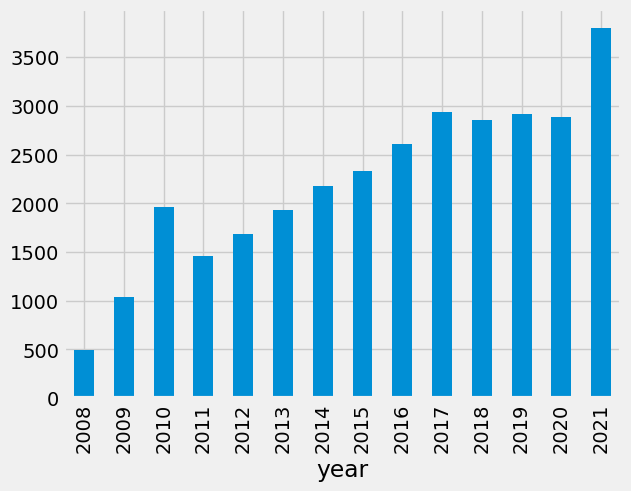

In [14]:
df_vwap.groupby('year')['VWAP'].mean().plot.bar()

<AxesSubplot: xlabel='month'>

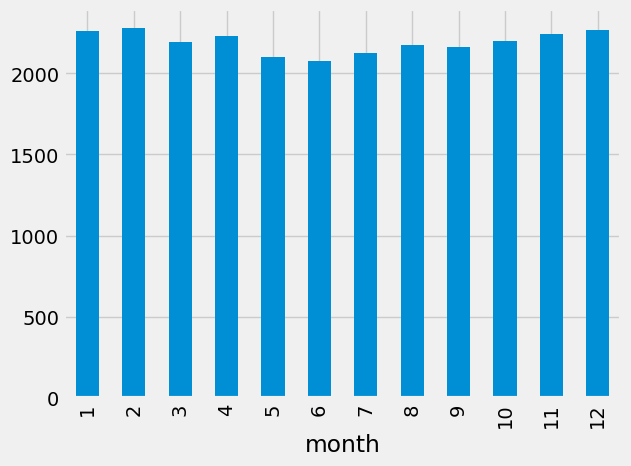

In [15]:
df_vwap.groupby('month')['VWAP'].mean().plot.bar()

<AxesSubplot: xlabel='day'>

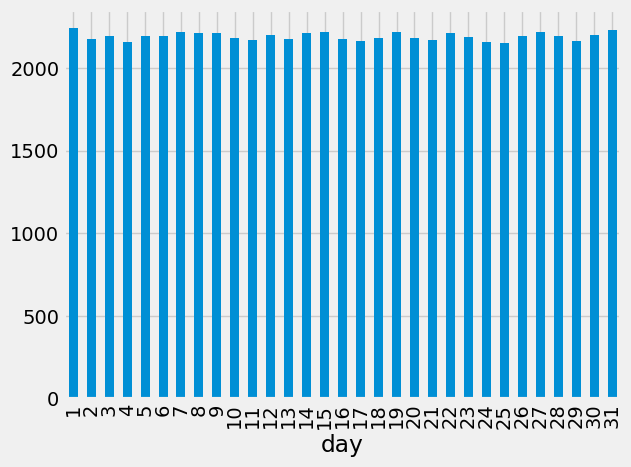

In [16]:
df_vwap.groupby('day')['VWAP'].mean().plot.bar()

<AxesSubplot: xlabel='day of week'>

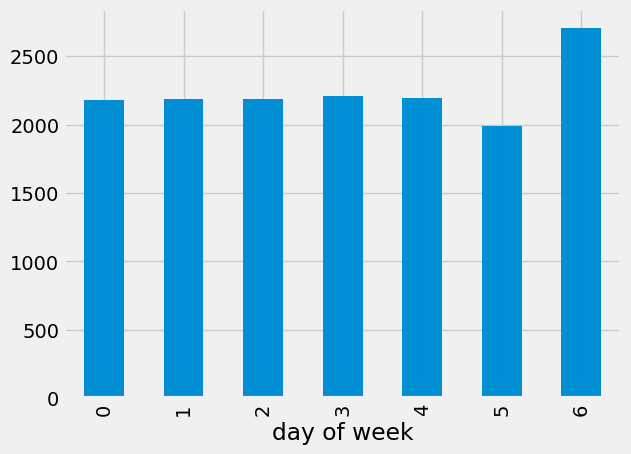

In [17]:
df_vwap.groupby('day of week')['VWAP'].mean().plot.bar()

In [18]:
df_vwap.resample(rule = 'A').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2008-12-31,496.564899,2008.0,8.798658,16.114094,1.932886
2009-12-31,1034.016626,2009.0,6.580247,15.761317,2.041152
2010-12-31,1962.621349,2010.0,6.599206,15.710317,1.992063
2011-12-31,1460.758259,2011.0,6.502024,15.829960,1.995951
2012-12-31,1685.465538,2012.0,6.438247,15.784861,2.047809


Text(0.5, 1.0, 'Yearly Mean VWAP for Bajaj')

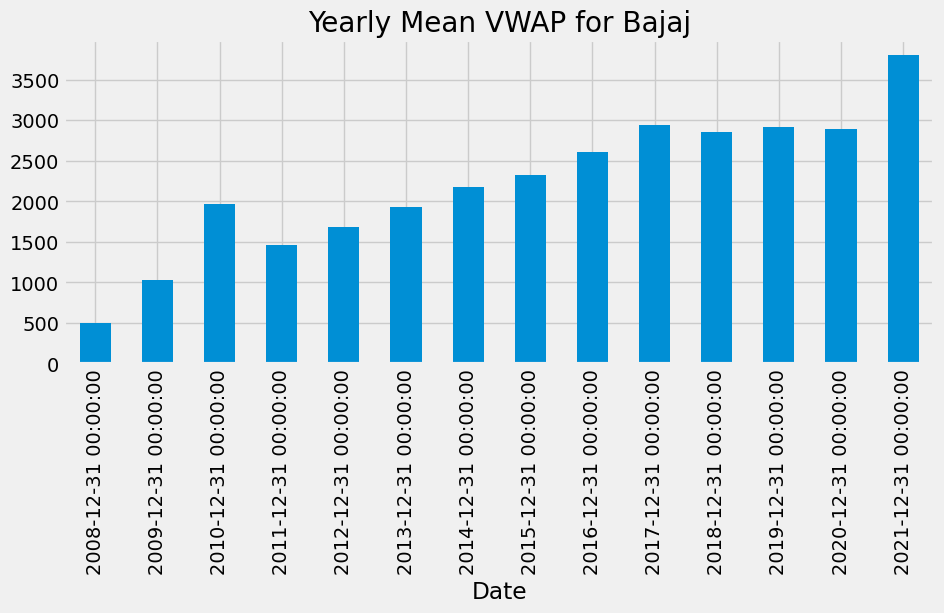

In [19]:
df_vwap['VWAP'].resample('A').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly Mean VWAP for Bajaj')

In [20]:
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2008-05-26,624.61,2008,5,26,0
2008-05-27,606.43,2008,5,27,1
2008-05-28,608.75,2008,5,28,2
2008-05-29,600.98,2008,5,29,3
2008-05-30,565.55,2008,5,30,4


In [21]:
df_vwap.shift(1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2008-05-26,NaN,NaN,NaN,NaN,NaN
2008-05-27,624.61,2008.0,5.0,26.0,0.0
2008-05-28,606.43,2008.0,5.0,27.0,1.0
2008-05-29,608.75,2008.0,5.0,28.0,2.0
2008-05-30,600.98,2008.0,5.0,29.0,3.0


In [22]:
df_vwap.shift(-1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2008-05-26,606.43,2008.0,5.0,27.0,1.0
2008-05-27,608.75,2008.0,5.0,28.0,2.0
2008-05-28,600.98,2008.0,5.0,29.0,3.0
2008-05-29,565.55,2008.0,5.0,30.0,4.0
2008-05-30,598.30,2008.0,6.0,2.0,0.0


<AxesSubplot: xlabel='Date'>

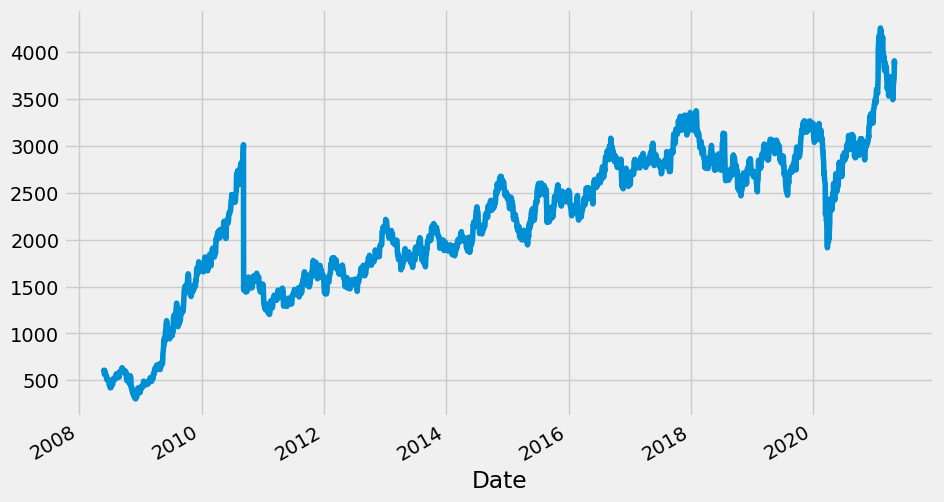

In [23]:
df_vwap['VWAP'].plot(figsize = (10,6))

<AxesSubplot: xlabel='Date'>

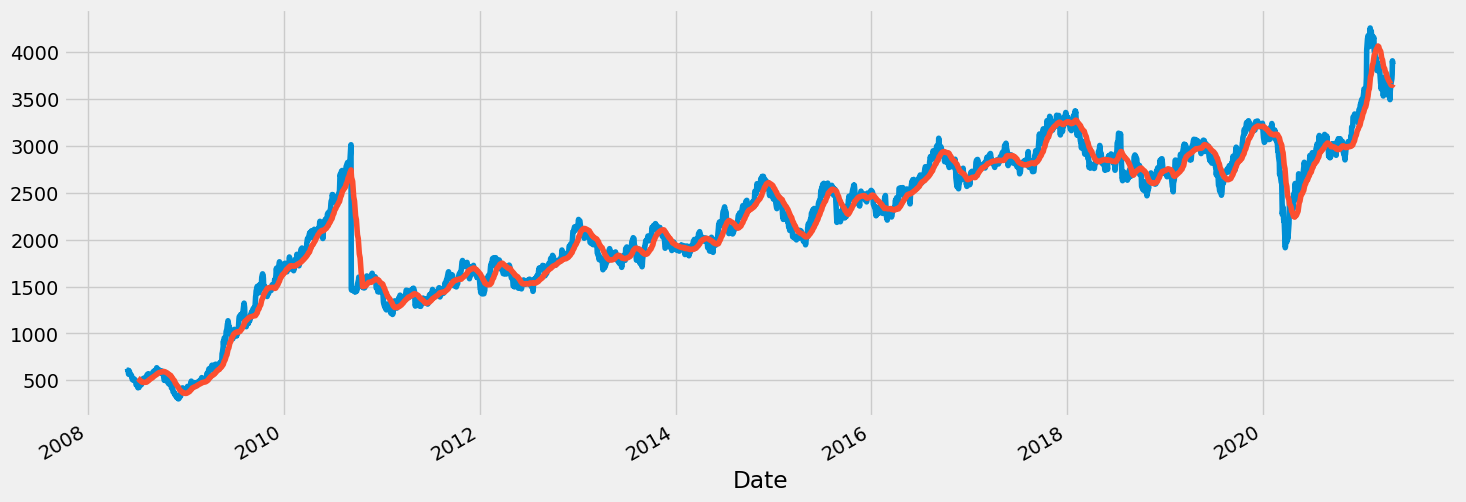

In [24]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))
